In [1]:
%matplotlib inline
# import mpld3
# mpld3.enable_notebook()

%load_ext autoreload

In [2]:
%autoreload
import sys
sys.path.insert(0, "../")

import pickle
import math as m
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from experiment_utils import plot_history, compare_histories
from rotation_rate_utils import plot_layerwise_angle_deviation_curves

/home/sicarbonnell/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
with open('../results.p','rb') as f: 
    results = pickle.load(f)

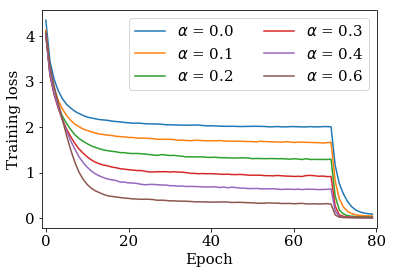

In [7]:
matplotlib.rcParams.update({'font.size': 15})

optimizer = 'SGD_layca'
alphas = [0.,0.1,0.2,0.3,0.4, 0.6]
for task in ['tiny-CNN']:
    plt.figure()
    plt.rc('text', usetex=False)
    plt.rc('font', family='serif')
    
    for alpha in alphas:
        history = results[task][optimizer][alpha][3**-3]['history']
        plt.plot(history['epoch'],history['history']['loss'], label = r'$\alpha$ = '+str(alpha))
    plt.legend(ncol=2)
    plt.ylabel('Training loss')
    plt.xlabel('Epoch')
    plt.xlim(-1,80)
    
    plt.savefig('figures/convergence_alpha_'+task+'.eps',format='eps', dpi=200, bbox_inches="tight")

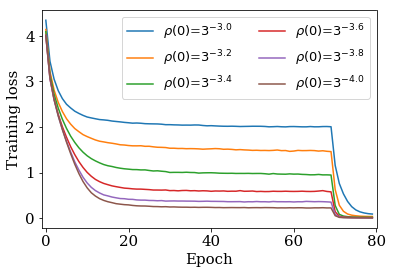

In [8]:
matplotlib.rcParams.update({'font.size': 15})

optimizer = 'SGD_layca'
lrs = [3.**(-i) for i in [3,3.2,3.4,3.6,3.8,4]] # range(-2,8)
for task in ['tiny-CNN']:
    plt.figure()
    plt.rc('text', usetex=False)
    plt.rc('font', family='serif')
    
    for lr in lrs:
        history = results[task][optimizer][0.][lr]['history']
        plt.plot(history['epoch'],history['history']['loss'], label = r'$\rho (0)$=$3^{'+str(round(m.log(lr,3),1))+'}$')
    plt.legend(ncol=2,fontsize = 13)
    plt.ylabel('Training loss')
    plt.xlabel('Epoch')
    plt.xlim(-1,80)
    
    plt.savefig('figures/convergence_lr_'+task+'.eps',format='eps', dpi=200, bbox_inches="tight")

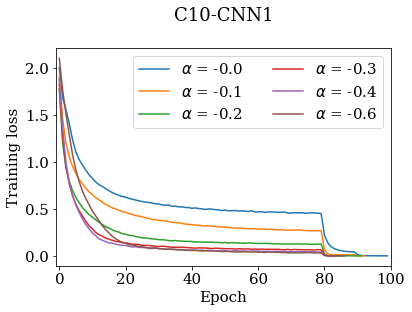

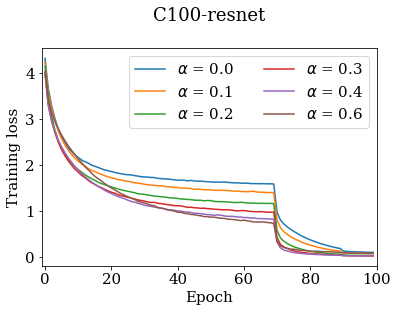

In [15]:
matplotlib.rcParams.update({'font.size': 15})

optimizer = 'SGD_layca'
alphas = np.array([0.,0.1,0.2,0.3,0.4,0.6])
for i,task in enumerate(['C10-CNN1','C100-resnet']):
    plt.figure()
    plt.rc('text', usetex=False)
    plt.rc('font', family='serif')
    
    sign = -1 if task == 'C10-CNN1' else 1
    for alpha in sign*alphas:
        history = results[task][optimizer][alpha][3**-3]['history']
        plt.plot(history['epoch'],history['history']['loss'], label = r'$\alpha$ = '+str(alpha))
#     if i == 0:
    plt.legend(ncol=2)
    
    plt.ylabel('Training loss')
    plt.xlabel('Epoch')
    plt.xlim(-1,100)
    plt.title(task,y = 1.1)
    
    plt.savefig('figures/convergence_alpha_'+task+'.eps',format='eps', dpi=200, bbox_inches="tight")

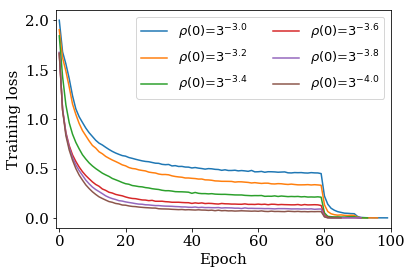

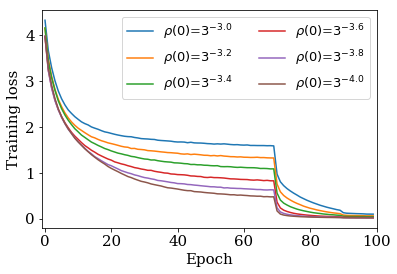

In [17]:
matplotlib.rcParams.update({'font.size': 15})

optimizer = 'SGD_layca'
lrs = [3.**(-i) for i in [3,3.2,3.4,3.6,3.8,4]] # range(-2,8)
for i,task in enumerate(['C10-CNN1','C100-resnet']):
    plt.figure()
    plt.rc('text', usetex=False)
    plt.rc('font', family='serif')
    
    for lr in lrs:
        history = results[task][optimizer][0.][lr]['history']
        plt.plot(history['epoch'],history['history']['loss'], label = r'$\rho (0)$=$3^{'+str(round(m.log(lr,3),1))+'}$')
#     if i ==0:
    plt.legend(ncol=2,fontsize = 13)
    
    plt.ylabel('Training loss')
    plt.xlabel('Epoch')
    plt.xlim(-1,100)
    
    plt.savefig('figures/convergence_lr_'+task+'.eps',format='eps', dpi=200, bbox_inches="tight")